#What is Elastic Net?


Elastic Net is a regularized regression model that combines l1 and l2 penalties, i.e., lasso and ridge regression. We have discussed the limitations of lasso regression, where we found the incapability of lasso is choosing the number of predictors. The elastic net includes the penalty of lasso regression, and when used in isolation, it becomes the ridge regression. In the procedure of regularization with an elastic net, first, we find the coefficient of ridge regression. After this, we perform a lasso algorithm on the ridge regression coefficient to shrink the coefficient.

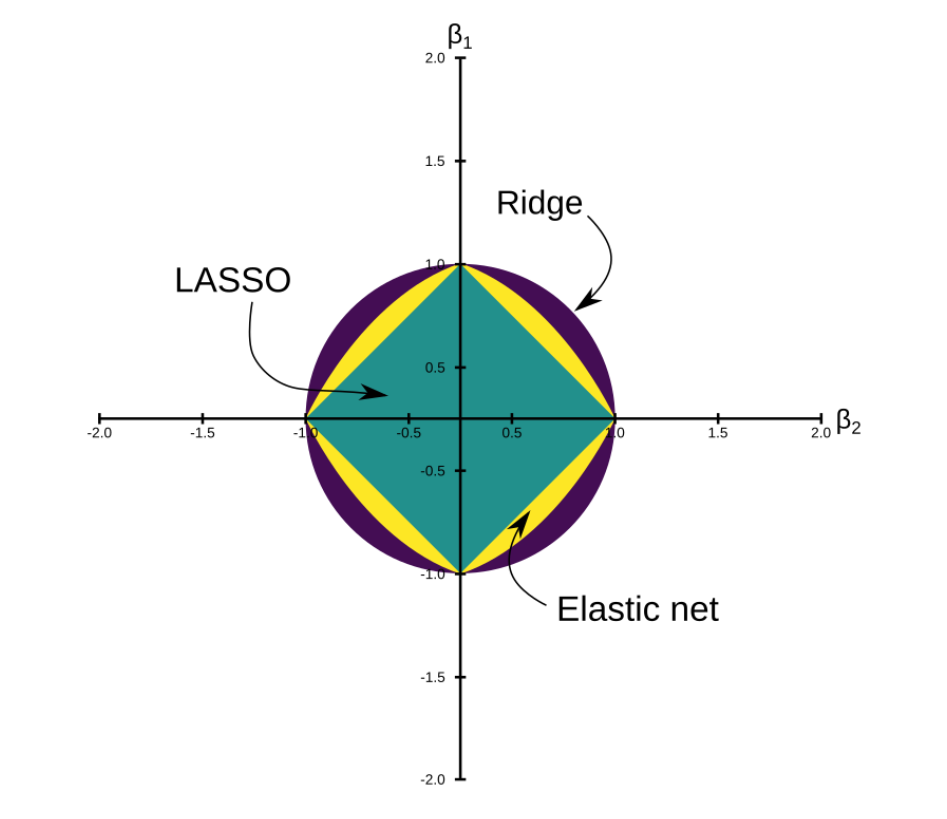

#Implementing ElasticNet Regression

We can perform ElasticNet in our analysis using python’s sklearn library, where the linear_model package consists of ElasticNet modules to perform an elastic net for regularization and variable selection. Next, in the article, I will compare the lasso, and elastic net regression in sklearn provided California housing data. In the data, we have got 20640 total samples with eight features. For a more detailed structure of the data, the reader can lead to this link.

Let’s start with loading the data.

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
X_data, y_data = fetch_california_housing(return_X_y=True)

Splitting the data for training and testing purposes:

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [5]:
print("shape of X :", X_data.shape, "shape of y :", y_data.shape)
print("shape of X_train :", X_train.shape, "shape of y_train :", y_train.shape)
print("shape of X_test :", X_test.shape, "shape of y_test :", y_test.shape)

shape of X : (20640, 8) shape of y : (20640,)
shape of X_train : (14448, 8) shape of y_train : (14448,)
shape of X_test : (6192, 8) shape of y_test : (6192,)


In [6]:
from sklearn.linear_model import Lasso
alpha = 0.1
model_lasso = Lasso(alpha=alpha)
print(model_lasso)

Lasso(alpha=0.1)


In [7]:
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
print(" r^2 of lasso on test data : %f" % r2_score(y_test, pred_lasso))

 r^2 of lasso on test data : 0.547880


In [9]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha=alpha, l1_ratio=0.3)
model_enet

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [10]:
model_enet.fit(X_train, y_train)

# Testing the model:
pred_enet = model_enet.predict(X_test)
print(" r^2 on test data : %f" %r2_score(y_test, pred_enet))

 r^2 on test data : 0.583884


#Decreasing coefficient alternated signs for visualization

In [11]:
import numpy as np
idx = np.arange(8)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0 # sparsify coef
y = np.dot(X_data, coef)
y

array([ 271.96616714, 1683.31659326,  378.45057142, ...,  745.18734767,
        566.38011758, 1001.31171415])

In [12]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as 

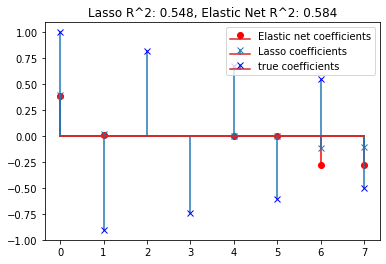

In [13]:
m, s, _ = plt.stem(np.where(model_enet.coef_)[0], model_enet.coef_[model_enet.coef_ != 0], markerfmt='bo', label='Elastic net coefficients')
plt.setp([m, s], color="green")
plt.stem(np.where(model_lasso.coef_)[0], model_lasso.coef_[model_lasso.coef_ != 0], markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='red')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients', markerfmt='bx')
plt.legend()
plt.title("Lasso R^2: %.3f, Elastic Net R^2: %.3f"  % (r2_score(y_test, pred_lasso),r2_score(y_test, pred_enet)))
plt.show()


Here we can see the estimated coefficients by both models, and we can also compare them. Here we can see that the lasso performed almost equally to the ElasticNet, but in some cases, the elastic net performed better than the lasso that is the reason behind the improved r square value of elastic net model